In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
import graphviz
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import misc
from sklearn import tree

from sklearn.model_selection import train_test_split

In [3]:
df_feature = pd.read_csv("train_values.csv", index_col='building_id')
df_label = pd.read_csv("train_labels.csv", index_col='building_id')
real_test = pd.read_csv("test_values.csv", index_col='building_id')

In [4]:
#sns.pairplot(df_feature.join(df_label))

In [5]:
#merge two dataframe according to the building_id.
df_feature = pd.merge(df_feature,df_label['damage_grade'], on="building_id")


In [6]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [7]:
col = df_feature.columns
for i in col:
    arr = np.array(df_feature[i].unique())
    print(i,": ",np.sort(arr))

geo_level_1_id :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
geo_level_2_id :  [   0    1    3 ... 1425 1426 1427]
geo_level_3_id :  [    0     1     3 ... 12564 12565 12567]
count_floors_pre_eq :  [1 2 3 4 5 6 7 8 9]
age :  [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 995]
area_percentage :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  69  70  72  73  75
  76  77  78  80  82  83  84  85  86  90  96 100]
height_percentage :  [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 28 31 32]
land_surface_condition :  ['n' 'o' 't']
foundation_type :  ['h' 'i' 'r' 'u' 'w']
roo

We can see this data set contains Numeric Types and Catalog Types, so we are going to make numerica types catalog.

In [8]:
'''df_feature['geo_level_1_id'] = df_feature['geo_level_1_id'] / df_feature['geo_level_1_id'].max()
df_feature['geo_level_2_id'] = df_feature['geo_level_2_id'] / df_feature['geo_level_2_id'].max()
df_feature['geo_level_3_id'] = df_feature['geo_level_3_id'] / df_feature['geo_level_3_id'].max()'''

"df_feature['geo_level_1_id'] = df_feature['geo_level_1_id'] / df_feature['geo_level_1_id'].max()\ndf_feature['geo_level_2_id'] = df_feature['geo_level_2_id'] / df_feature['geo_level_2_id'].max()\ndf_feature['geo_level_3_id'] = df_feature['geo_level_3_id'] / df_feature['geo_level_3_id'].max()"

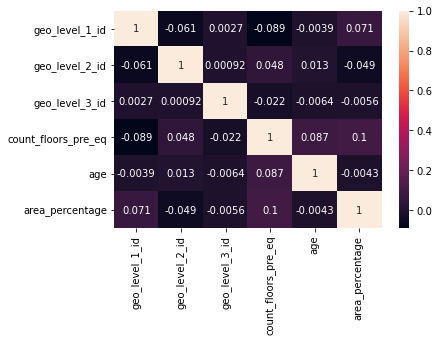

In [9]:
corrMatrix = df_feature.iloc[:, 0:6].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
'''df_feature=df_feature.drop(["has_superstructure_stone_flag"], axis=1)
df_feature=df_feature.drop(["has_superstructure_cement_mortar_stone"], axis=1)
df_feature=df_feature.drop(["has_superstructure_rc_non_engineered"], axis=1)
df_feature=df_feature.drop(["has_superstructure_rc_engineered"], axis=1)
df_feature=df_feature.drop(["has_superstructure_other"], axis=1)'''

'df_feature=df_feature.drop(["has_superstructure_stone_flag"], axis=1)\ndf_feature=df_feature.drop(["has_superstructure_cement_mortar_stone"], axis=1)\ndf_feature=df_feature.drop(["has_superstructure_rc_non_engineered"], axis=1)\ndf_feature=df_feature.drop(["has_superstructure_rc_engineered"], axis=1)\ndf_feature=df_feature.drop(["has_superstructure_other"], axis=1)'

# From above information, we can see most features are binary. Therefore, we plan to use random forest tree. There are some issures we need to fix. First of all,  the features from 0 to 6 are variable. Second, the data type is int64 which is too big for binary type data. Finally, this dataframe contains 37 features, and after we use get dummy method, it will generate more features, so we need to use feature selection and extraction to reduce the features.

In [11]:
#Add plot to show we can drop geo level, but had better not.
'''df_feature=df_feature.drop(["geo_level_1_id"], axis=1)
df_feature=df_feature.drop(["geo_level_2_id"], axis=1)
df_feature=df_feature.drop(["geo_level_3_id"], axis=1)'''

'df_feature=df_feature.drop(["geo_level_1_id"], axis=1)\ndf_feature=df_feature.drop(["geo_level_2_id"], axis=1)\ndf_feature=df_feature.drop(["geo_level_3_id"], axis=1)'

In [12]:
#Add plot to show the most damage buildings are below 50

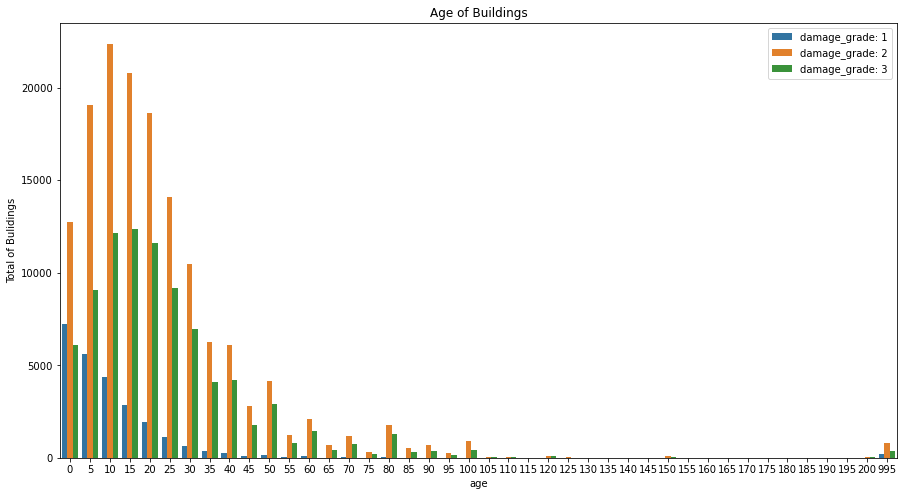

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x=df_feature["age"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.title("Age of Buildings")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")
plt.show()

In [14]:
#According to the above plot, we split the age feature to three groups, 1~50, 51~100, above 100.
for data, row in df_feature.iterrows():
    if row.age <= 50:
        df_feature.loc[data, 'age'] = 1
    elif row.age > 50 and row.age <= 100:
        df_feature.loc[data, 'age'] = 2
    elif row.age > 100 :
        df_feature.loc[data, 'age'] = 3

In [15]:
########

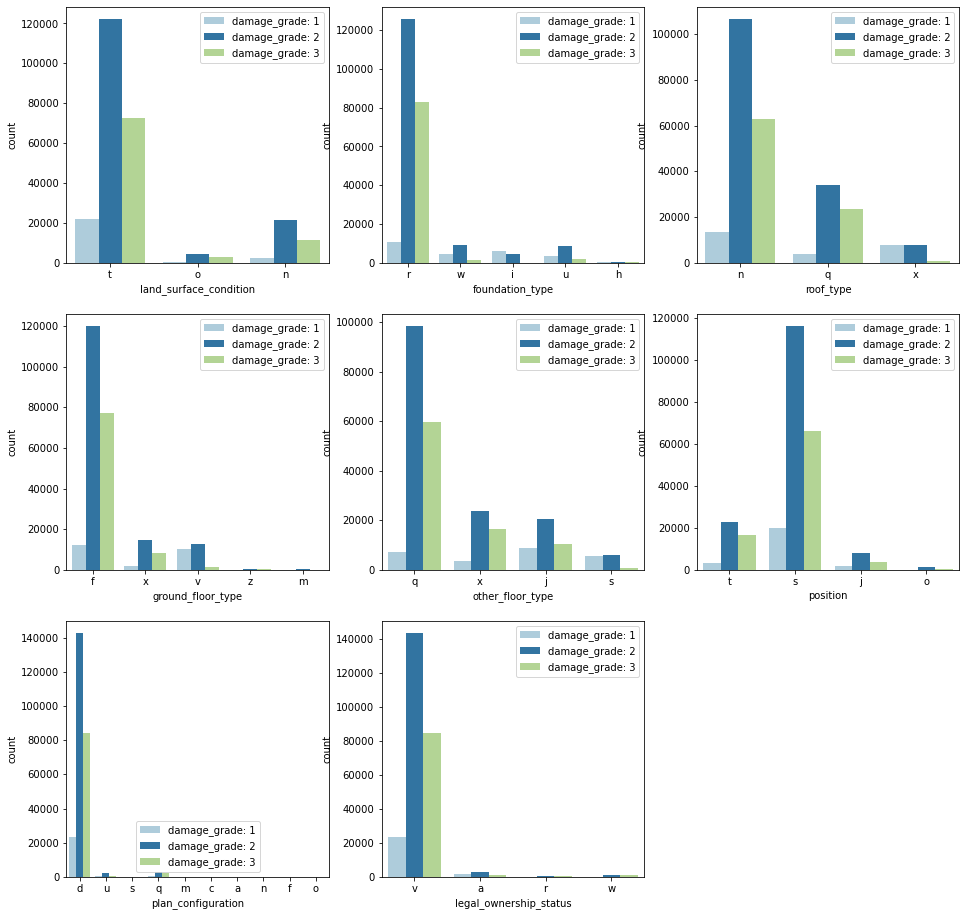

In [16]:
feature_object=df_feature.select_dtypes(include="object")
#font={'weight' : 'bold', 'size': 12}       
counter=1
plt.figure(figsize=(16,16))
for j in feature_object:
    plt.subplot(3,3,counter)
    ax=sns.countplot(df_feature[j].dropna(),palette="Paired",hue=df_feature["damage_grade"])
    #plt.xticks(**font)
    #plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"])
    counter+=1
plt.show()

# Covert object to 1 and 0 accouding to the plot from above

In [17]:
df_feature.foundation_type.replace({"r":1,"w":0,"i":0,"u":0,"h":0}, inplace=True)
df_feature.plan_configuration.replace({"d":1,"u":0,"s":0,"q":0,"m":0,"c":0,"a":0,"n":0,"f":0,"o":0}, inplace=True)
df_feature.legal_ownership_status.replace({"v": 1,"a":0,"r":0,"w":0}, inplace=True)

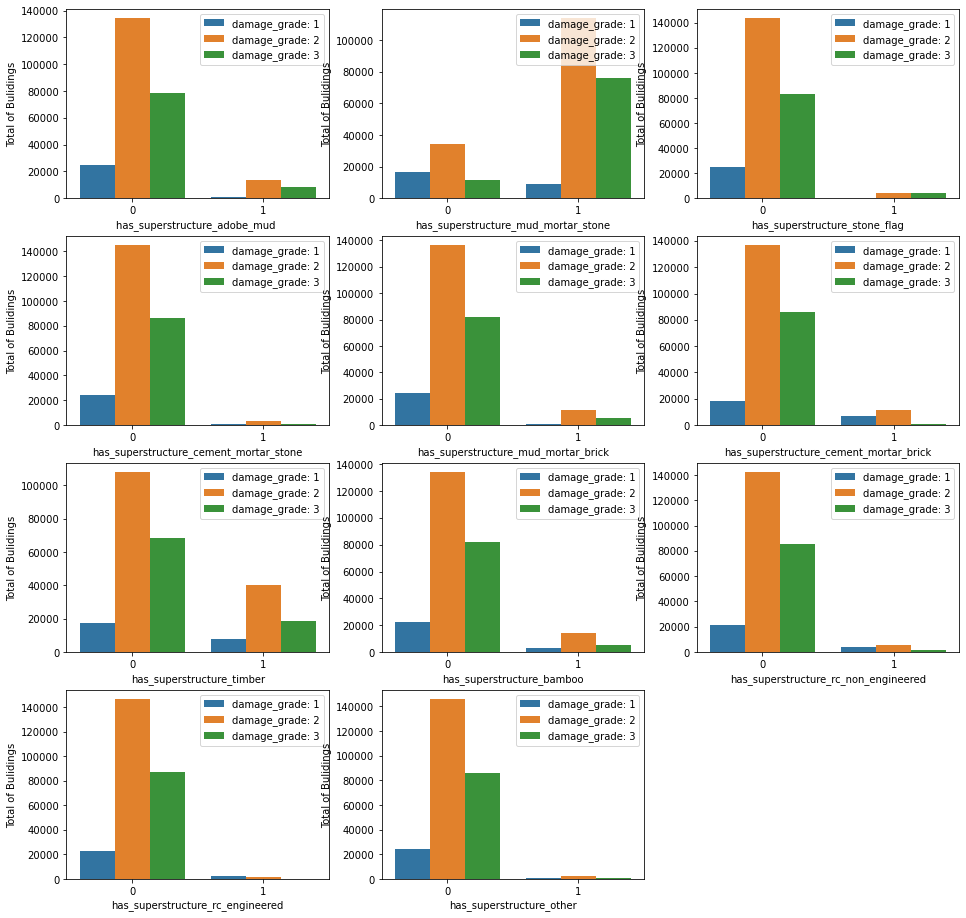

In [19]:
plt.figure(figsize=(16,16))
plt.subplot(4,3,1)
sns.countplot(x=df_feature["has_superstructure_adobe_mud"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_adobe_mud ")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,2)
sns.countplot(x=df_feature["has_superstructure_mud_mortar_stone"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_mud_mortar_stone")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,3)
sns.countplot(x=df_feature["has_superstructure_stone_flag"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_stone_flag")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")
  
plt.subplot(4,3,4)
sns.countplot(x=df_feature["has_superstructure_cement_mortar_stone"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_cement_mortar_stone")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,5)
sns.countplot(x=df_feature["has_superstructure_mud_mortar_brick"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_mud_mortar_brick")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,6)
sns.countplot(x=df_feature["has_superstructure_cement_mortar_brick"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_cement_mortar_brick")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,7)
sns.countplot(x=df_feature["has_superstructure_timber"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_timber")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,8)
sns.countplot(x=df_feature["has_superstructure_bamboo"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_bamboo")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,9)
sns.countplot(x=df_feature["has_superstructure_rc_non_engineered"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_rc_non_engineered")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,10)
sns.countplot(x=df_feature["has_superstructure_rc_engineered"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_rc_engineered")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,11)
sns.countplot(x=df_feature["has_superstructure_other"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_superstructure_other")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")


plt.show()

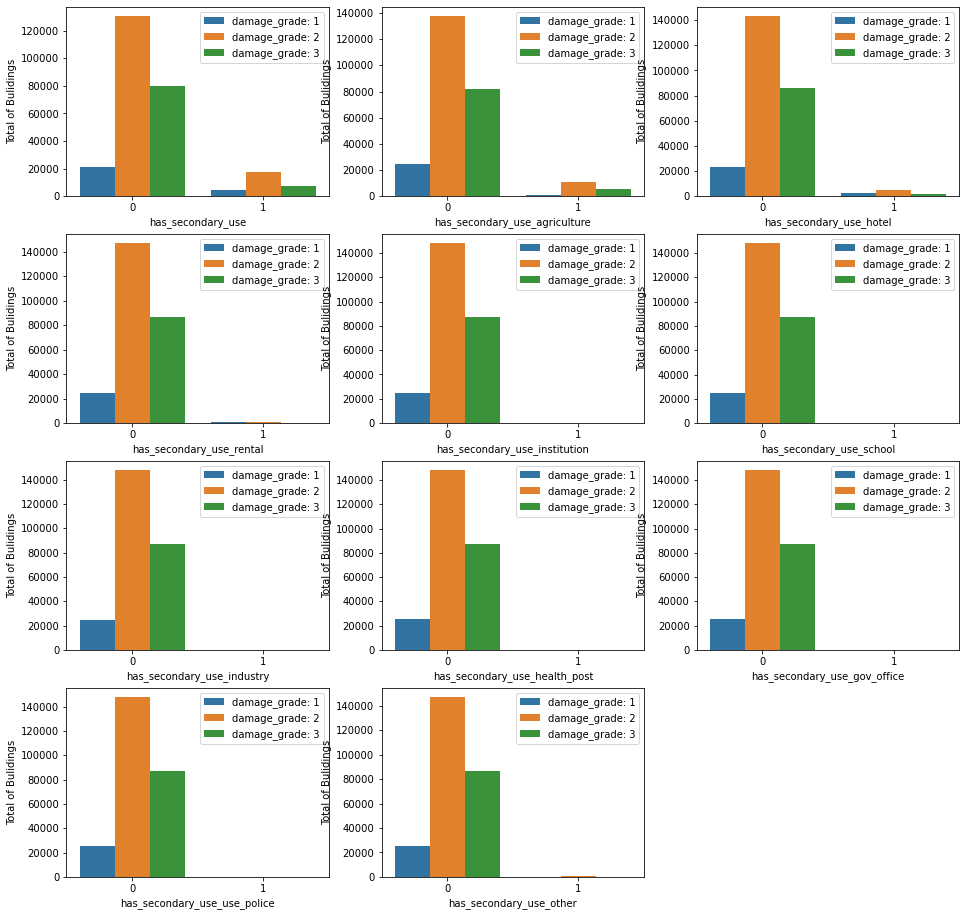

In [20]:
plt.figure(figsize=(16,16))
plt.subplot(4,3,1)
sns.countplot(x=df_feature["has_secondary_use"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,2)
sns.countplot(x=df_feature["has_secondary_use_agriculture"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_agriculture")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,3)
sns.countplot(x=df_feature["has_secondary_use_hotel"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_hotel")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")
  
plt.subplot(4,3,4)
sns.countplot(x=df_feature["has_secondary_use_rental"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_rental")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,5)
sns.countplot(x=df_feature["has_secondary_use_institution"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_institution")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,6)
sns.countplot(x=df_feature["has_secondary_use_school"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_school")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,7)
sns.countplot(x=df_feature["has_secondary_use_industry"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_industry")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,8)
sns.countplot(x=df_feature["has_secondary_use_health_post"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_health_post")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,9)
sns.countplot(x=df_feature["has_secondary_use_gov_office"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_gov_office")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,10)
sns.countplot(x=df_feature["has_secondary_use_use_police"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_use_police")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")

plt.subplot(4,3,11)
sns.countplot(x=df_feature["has_secondary_use_other"],hue=df_feature["damage_grade"])
plt.ylabel("Total of Bulidings")
plt.xlabel("has_secondary_use_other")
plt.legend(["damage_grade: 1","damage_grade: 2","damage_grade: 3"],loc="upper right")


plt.show()

In [21]:
df_feature

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,1,6,5,t,1,n,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,1,8,7,o,1,n,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,1,5,5,t,1,n,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,1,6,5,t,1,n,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,1,8,9,t,1,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,2,6,3,n,1,n,...,0,0,0,0,0,0,0,0,0,2
669485,17,715,2060,2,1,6,5,t,1,n,...,0,0,0,0,0,0,0,0,0,3
602512,17,51,8163,3,2,6,7,t,1,q,...,0,0,0,0,0,0,0,0,0,3


# Applying the get dummy.

In [22]:
df_feature.drop(columns=["has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"],inplace=True)

In [23]:
df_tempX = df_feature.iloc[:,0:-1] 
df_tempY = df_feature.iloc[:,-1] 

In [24]:
df_feature_covert_to_more_features = pd.get_dummies(df_tempX)

In [25]:
df_tempY

building_id
802906    3
28830     2
94947     3
590882    2
201944    3
         ..
688636    2
669485    3
602512    3
151409    2
747594    3
Name: damage_grade, Length: 260601, dtype: int64

In [26]:
df_feature = pd.merge(df_feature_covert_to_more_features,df_tempY, on="building_id")


In [27]:
df_feature

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,foundation_type,plan_configuration,has_superstructure_adobe_mud,...,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,1,6,5,1,1,1,...,0,0,1,0,0,0,0,0,1,3
28830,8,900,2812,2,1,8,7,1,1,0,...,0,0,1,0,0,0,0,1,0,2
94947,21,363,8973,2,1,5,5,1,1,0,...,0,0,0,0,1,0,0,0,1,3
590882,22,418,10694,2,1,6,5,1,1,0,...,0,0,0,0,1,0,0,1,0,2
201944,11,131,1488,3,1,8,9,1,1,1,...,0,0,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,2,6,3,1,0,0,...,0,1,0,0,0,0,0,1,0,2
669485,17,715,2060,2,1,6,5,1,1,0,...,0,0,1,0,0,0,0,1,0,3
602512,17,51,8163,3,2,6,7,1,1,0,...,0,0,1,0,0,0,0,1,0,3


In [28]:
df_feature.head(5)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,foundation_type,plan_configuration,has_superstructure_adobe_mud,...,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,1,6,5,1,1,1,...,0,0,1,0,0,0,0,0,1,3
28830,8,900,2812,2,1,8,7,1,1,0,...,0,0,1,0,0,0,0,1,0,2
94947,21,363,8973,2,1,5,5,1,1,0,...,0,0,0,0,1,0,0,0,1,3
590882,22,418,10694,2,1,6,5,1,1,0,...,0,0,0,0,1,0,0,1,0,2
201944,11,131,1488,3,1,8,9,1,1,1,...,0,0,0,0,1,0,0,1,0,3


In [29]:
df_feature_covert_to_more_features=df_feature

# Covert data type to uint8, so we can speed up our training

In [30]:
feature = df_feature_covert_to_more_features.columns

In [31]:
feature

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'foundation_type', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'land_surface_condition_n', 'land_surface_condition_o',
       'land_surface_condition_t', 'roof_type_n', 'roof_type_q', 'roof_type_x',
       'ground_floor_type_f', 'ground_floor_type_m', 'ground_floor_type_v',
       'ground_floor_type_x', 'ground_floor_type_z', 'other_floor_type_j',
       'other_flo

In [32]:
df=df_feature_covert_to_more_features.copy()

In [33]:
for i in feature:
    df[i] = df[i].astype('uint8')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  uint8
 1   geo_level_2_id                          260601 non-null  uint8
 2   geo_level_3_id                          260601 non-null  uint8
 3   count_floors_pre_eq                     260601 non-null  uint8
 4   age                                     260601 non-null  uint8
 5   area_percentage                         260601 non-null  uint8
 6   height_percentage                       260601 non-null  uint8
 7   foundation_type                         260601 non-null  uint8
 8   plan_configuration                      260601 non-null  uint8
 9   has_superstructure_adobe_mud            260601 non-null  uint8
 10  has_superstructure_mud_mortar_stone     260601 non-null  uint8


In [35]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

In [36]:
X

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,foundation_type,plan_configuration,has_superstructure_adobe_mud,...,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,231,166,2,1,6,5,1,1,1,...,0,0,0,1,0,0,0,0,0,1
28830,8,132,252,2,1,8,7,1,1,0,...,1,0,0,1,0,0,0,0,1,0
94947,21,107,13,2,1,5,5,1,1,0,...,0,0,0,0,0,1,0,0,0,1
590882,22,162,198,2,1,6,5,1,1,0,...,0,0,0,0,0,1,0,0,1,0
201944,11,131,208,3,1,8,9,1,1,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,55,85,1,2,6,3,1,0,0,...,0,0,1,0,0,0,0,0,1,0
669485,17,203,12,2,1,6,5,1,1,0,...,0,0,0,1,0,0,0,0,1,0
602512,17,51,227,3,2,6,7,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
Y.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

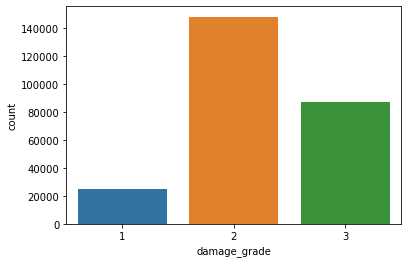

In [38]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.countplot(x=Y, data=df)

In [39]:
feature = X.columns
label = ["damage_grade"]

In [40]:
feature

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'foundation_type', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'land_surface_condition_n', 'land_surface_condition_o',
       'land_surface_condition_t', 'roof_type_n', 'roof_type_q', 'roof_type_x',
       'ground_floor_type_f', 'ground_floor_type_m', 'ground_floor_type_v',
       'ground_floor_type_x', 'ground_floor_type_z', 'other_floor_type_j',
       'other_flo

# Feature Selection: ANOVA of feature_selection.f_classif

In [41]:
'''from sklearn.preprocessing import StandardScaler
#cols = sub_feature
scaler = StandardScaler()
X.loc[:, feature]  = scaler.fit_transform(X[feature])'''

'from sklearn.preprocessing import StandardScaler\n#cols = sub_feature\nscaler = StandardScaler()\nX.loc[:, feature]  = scaler.fit_transform(X[feature])'

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   geo_level_1_id                          260601 non-null  uint8
 1   geo_level_2_id                          260601 non-null  uint8
 2   geo_level_3_id                          260601 non-null  uint8
 3   count_floors_pre_eq                     260601 non-null  uint8
 4   age                                     260601 non-null  uint8
 5   area_percentage                         260601 non-null  uint8
 6   height_percentage                       260601 non-null  uint8
 7   foundation_type                         260601 non-null  uint8
 8   plan_configuration                      260601 non-null  uint8
 9   has_superstructure_adobe_mud            260601 non-null  uint8
 10  has_superstructure_mud_mortar_stone     260601 non-null  uint8


In [43]:
Y

building_id
802906    3
28830     2
94947     3
590882    2
201944    3
         ..
688636    2
669485    3
602512    3
151409    2
747594    3
Name: damage_grade, Length: 260601, dtype: uint8

In [44]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X, Y)

In [45]:
result


array([0.13344381, 0.0850219 , 0.02146566, 0.03109561, 0.02482075,
       0.01489036, 0.0242248 , 0.0833466 , 0.02717699, 0.00436128,
       0.06724717, 0.00350686, 0.        , 0.00271359, 0.033933  ,
       0.00440866, 0.00317349, 0.01191632, 0.01602801, 0.00042892,
       0.02709204, 0.02371774, 0.00164756, 0.        , 0.00093622,
       0.02050763, 0.02130955, 0.00341249, 0.03939512, 0.05062781,
       0.        , 0.05163335, 0.        , 0.00058338, 0.01378146,
       0.03725188, 0.02701516, 0.00289984, 0.0002147 , 0.        ,
       0.01822118, 0.00093805])

In [46]:
import heapq
import numpy
#a = numpy.array([1, 3, 2, 4, 5])
min_index = heapq.nsmallest(10, range(len(result)), result.take)
min_index.sort()
print(min_index)

[12, 19, 23, 24, 30, 32, 33, 38, 39, 41]


In [47]:
print("We are going to drop following features", feature[min_index])

We are going to drop following features Index(['has_superstructure_cement_mortar_stone', 'has_superstructure_other',
       'land_surface_condition_n', 'land_surface_condition_o',
       'ground_floor_type_m', 'ground_floor_type_x', 'ground_floor_type_z',
       'position_j', 'position_o', 'position_t'],
      dtype='object')


In [48]:
X.drop(columns=list(X.iloc[:, min_index].columns),inplace=True)

C:\Users\Fan_2019\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
X.shape

(260601, 32)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [51]:
# Code resource: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
# ANOVA feature selection for numeric input and categorical output

# define feature selection
'''fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)'''

'fs = SelectKBest(score_func=f_classif, k=10)\n# apply feature selection\nX_selected = fs.fit_transform(X, Y)\nprint(X_selected.shape)'

In [52]:
for i in feature:
    df[i] = df[i].astype('uint8')

In [53]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='brute')
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3, weights='distance')

In [54]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, clf.predict(X_test)))

Accuracy: 0.6945165705222497


In [55]:
from ipynb.fs.full.my_functions import LG 
Y_pred, accuracy_LG = LG(X_train, Y_train, X_test, Y_test)
print("Accuracy of LogisticRegression:", accuracy_LG)

Accuracy of LogisticRegression: 0.5685652524270602


C:\Users\Fan_2019\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
#############

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [59]:
Y_pred = rfc.predict(X_test)

In [60]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.7095202159092363


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 3517,  3795,   243],
       [ 1962, 35760,  6553],
       [  233,  9924, 16194]], dtype=int64)

In [62]:
Y_test.value_counts()

2    44275
3    26351
1     7555
Name: damage_grade, dtype: int64

In [63]:
#code link:https://github.com/rekharchandran/Modeling-Earthquake-Damage/blob/master/Earth%20quake%20preprocess.ipynb
'''RF = RandomForestClassifier()
def RF_param_selection(X, y, nfolds):
   trees = [50,55,60,65,70,75,80,85,90,95,100]
   param_grid = {'n_estimators': trees}
   grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
   grid_search.fit(X, y)
   grid_search.best_params_
   return grid_search.best_params_'''


"RF = RandomForestClassifier()\ndef RF_param_selection(X, y, nfolds):\n   trees = [50,55,60,65,70,75,80,85,90,95,100]\n   param_grid = {'n_estimators': trees}\n   grid_search = GridSearchCV(RF, param_grid, cv=nfolds)\n   grid_search.fit(X, y)\n   grid_search.best_params_\n   return grid_search.best_params_"

In [64]:
#Y_pred = RF_param_selection(X_train,Y_train, 5)

In [65]:
#rint("Accuracy:", accuracy_score(Y_test, Y_pred))